# Explicaci√≥n inicial de Regresi√≥n lineal

**Autor:** Jazna Meza Hidalgo

**Correo Electr√≥nico:** ymeza@ubiobio.cl

**Fecha de Creaci√≥n:** Septiembre de 2024  
**Versi√≥n:** 1.0  

**Fecha de Actualizaci√≥n:** Abril de 2025  
**Versi√≥n:** 2.0  


---

## Descripci√≥n

Este notebook muestra un ejemplo para explicar el concepto de regresi√≥n lineal, se explica lo que se realiza cuando se aplica un algoritmo de regresi√≥n lineal, en este caso, el m√°s sencillo de todos.

---

## Requisitos de Software

Este notebook fue desarrollado con Python 3.9. A continuaci√≥n se listan las bibliotecas necesarias:

- pandas (>=1.1.0)
- numpy (1.26.4)
- matplotlib (3.7.1)

Para verificar si est√° instalado pandas, numpy o matplotlib ejecutar:

```bash
pip show pandas
```

```bash
pip show numpy
```

```bash
pip show matplotlib
```

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd
import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split

# Ejemplo b√°sico

## Datos de ejemplo
+ Se trabaja con un conjunto simple de puntos
+ X representa los valores de entrada (variable independiente)
+ y representa los valores a predecir (variable dependiente)

Pendiente o coeficiente (m): 0.80
Intersecci√≥n con el eje Y (b): 0.40


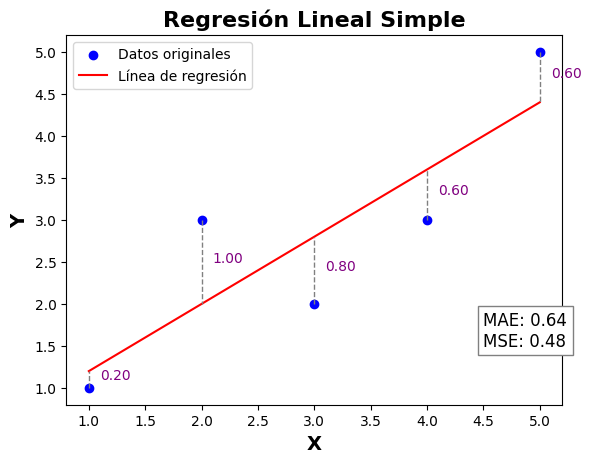

In [13]:
X = np.array([1, 2, 3, 4, 5]).reshape(-1, 1)  # reshape convierte el array en columna
y = np.array([1, 3, 2, 3, 5])

# Crear el modelo de regresi√≥n lineal
modelo = LinearRegression()

# Ajustar el modelo a los datos
modelo.fit(X, y)

# Realizar predicciones (en este caso predice para los mismos puntos)
y_pred = modelo.predict(X)

# Mostrar los resultados
print("Pendiente o coeficiente (m): {:.2f}".format(modelo.coef_[0]))
print("Intersecci√≥n con el eje Y (b): {:.2f}".format(modelo.intercept_))

# Calcular m√©tricas
mae = mean_absolute_error(y, y_pred)
mse = mean_squared_error(y, y_pred)

# Graficar los puntos originales
plt.scatter(X, y, color='blue', label='Datos originales')

# Graficar la l√≠nea de regresi√≥n
plt.plot(X, y_pred, color='red', label='L√≠nea de regresi√≥n')

# Dibujar l√≠neas de error
for xi, yi, ypi in zip(X.flatten(), y, y_pred):
    plt.plot([xi, xi], [yi, ypi], color='gray', linestyle='--', linewidth=1)
    # Etiqueta para el error
    error = abs(yi - ypi)
    plt.text(xi + 0.1, (yi + ypi) / 2, f"{error:.2f}", fontsize=10, color='purple')

# Agregar m√©tricas al gr√°fico
plt.text(max(X) - 0.5, min(y) + 0.5, f"MAE: {mae:.2f}\nMSE: {mse:.2f}", fontsize=12, color='black',
         bbox=dict(facecolor='white', edgecolor='gray'))

# Etiquetas y t√≠tulo del gr√°fico
plt.xlabel('X', fontsize=14, fontweight="bold")
plt.ylabel('Y', fontsize=14, fontweight="bold")
plt.title('Regresi√≥n Lineal Simple', fontsize=16, fontweight="bold")
plt.legend()

# Mostrar gr√°fico
plt.show()


Esto significa que la l√≠nea de regresi√≥n es:

y = 0.8x + 0.4


In [14]:
np.array([1, 2, 3, 4, 5])

array([1, 2, 3, 4, 5])

## Entendiendo el concepto de error

In [15]:
# C√°lculo del error (valor real - valor predicho)
error = y - y_pred

# Crear un DataFrame para mostrar los resultados
tabla = pd.DataFrame({
    'X': np.array([1, 2, 3, 4, 5]),
    'Y (Real)': y,
    'Y (Predicho)': y_pred,
    'Error': error
})

# Mostrar la tabla
tabla

X  Y (Real)  Y (Predicho)  Error
0  1         1           1.2   -0.2
1  2         3           2.0    1.0
2  3         2           2.8   -0.8
3  4         3           3.6   -0.6
4  5         5           4.4    0.6

In [16]:
# C√°lculo manual del MSE
mse_manual = np.mean((y - y_pred) ** 2)

# C√°lculo del MSE usando scikit-learn
mse_sklearn = mean_squared_error(y, y_pred)

# Mostrar ambos resultados
print(f"MSE calculado manualmente: {mse_manual : .2f}")
print(f"MSE calculado con scikit-learn: {mse_sklearn : .2f}")

MSE calculado manualmente:  0.48
MSE calculado con scikit-learn:  0.48


In [17]:
# Funcinones para ayudar con la interpretaci√≥n de las m√©tricas
def interpretacion(algoritmo : str, score : float, contexto : str, caracteristicas : np.array = None):
  if not caracteristicas == None:
    return f"""Modelo de regresi√≥n {algoritmo}
    {score :.2%} de la variabilidad en {contexto} se puede explicar utilizando: {caracteristicas.values}."""
  else:
    return f"""Modelo de regresi√≥n {algoritmo}
      {score :.2%} de la variabilidad en {contexto} se puede explicar utilizando las variables independientes"""

def mae_interpretacion(modelo : str, value : float, contexto : str):
  print(f"El modelo '{modelo}' pudo predecir {contexto} en el conjunto de prueba con un error de ¬± $ {value:.2f} del valor real.")

def msle_interpretacion(modelo : str, value : float, contexto : str):
  print(f"El modelo '{modelo}' pudo predecir {contexto} en el conjunto de prueba con un error de ¬± {value: .2%} del valor real.")

In [18]:
score_modelo = modelo.score(X, y)
print(score_modelo)

0.7272727272727273


In [19]:
print(interpretacion("Regresi√≥n lineal", score_modelo, "y"))

Modelo de regresi√≥n Regresi√≥n lineal
      72.73% de la variabilidad en y se puede explicar utilizando las variables independientes


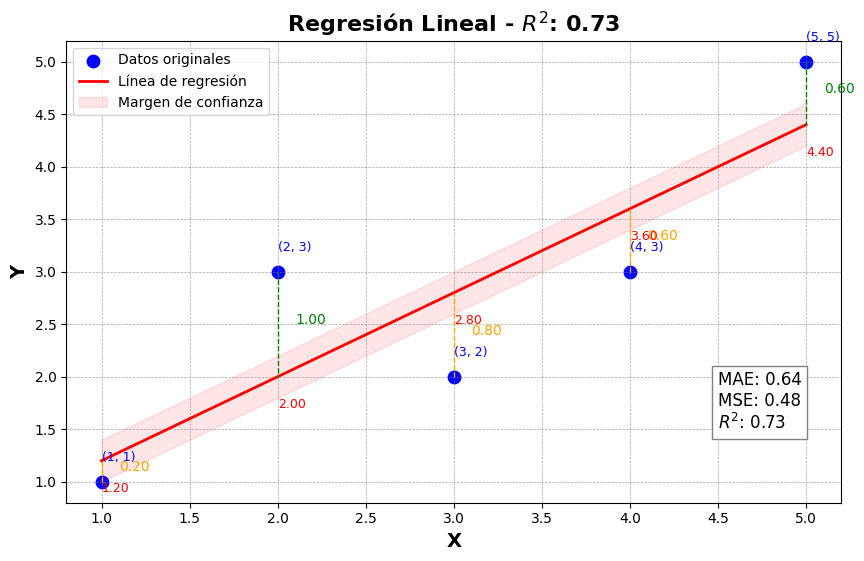

In [20]:
# Gr√°fico
plt.figure(figsize=(10, 6))

# Puntos originales
plt.scatter(X, y, color='blue', s=80, label='Datos originales')

# L√≠nea de regresi√≥n con sombra
plt.plot(X, y_pred, color='red', label='L√≠nea de regresi√≥n', linewidth=2)
plt.fill_between(X.flatten(), y_pred - 0.2, y_pred + 0.2, color='red', alpha=0.1, label='Margen de confianza')

# L√≠neas de error
for xi, yi, ypi in zip(X.flatten(), y, y_pred):
    color = 'green' if yi > ypi else 'orange'  # Diferenciar errores positivos y negativos
    plt.plot([xi, xi], [yi, ypi], color=color, linestyle='--', linewidth=1)
    plt.text(xi + 0.1, (yi + ypi) / 2, f"{abs(yi - ypi):.2f}", fontsize=10, color=color)

# Anotaciones
for xi, yi, ypi in zip(X.flatten(), y, y_pred):
    plt.text(xi, yi + 0.2, f"({xi}, {yi})", fontsize=9, color='blue')
    plt.text(xi, ypi - 0.3, f"{ypi:.2f}", fontsize=9, color='red')

# M√©tricas en el gr√°fico
plt.text(max(X) - 0.5, min(y) + 0.5, f"MAE: {mae:.2f}\nMSE: {mse:.2f}\n$R^2$: {score_modelo:.2f}",
         fontsize=12, color='black', bbox=dict(facecolor='white', edgecolor='gray'))

# Estilo del gr√°fico
plt.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.7)
plt.xlabel('X', fontsize=14, fontweight="bold")
plt.ylabel('Y', fontsize=14, fontweight="bold")
plt.title(f'Regresi√≥n Lineal - $R^2$: {score_modelo:.2f}', fontsize=16, fontweight="bold")
plt.legend()

# Mostrar gr√°fico
plt.show()

**¬øQu√© es el margen de confianza?**

El margen de confianza representa un rango dentro del cual es probable que se encuentren los valores reales de la variable dependiente
$ùëå$, dado un valor de $X$.

Este margen se suele calcular a partir del intervalo de confianza para la media predicha por el modelo lineal.

Esta √°rea da una idea de la incertidumbre asociada a la predicci√≥n hecha por el modelo lineal.

**¬øC√≥mo se calcula?**

En regresi√≥n lineal (este es el caso) se calcula:

$\hat{y}(x_0) \pm t\times SE(\hat{y}(x_0))$

Donde:

+ $\hat{y}(x_0)$ es la predicci√≥n del modelo para $x_0$
+ $SE(\hat{y}(x_0))$ es un error est√°ndar de la predicci√≥n en $x_0$
+ $t$ es el valor cr√≠tico de la distribuci√≥n t-student para un cierto nivel de confianza (95% por ejemplo)

**¬øC√≥mo se calcula el error est√°ndar?**

$SE(\hat{y}(x_0))=s\times\sqrt{\frac{1}{n}+\frac{(x_0-\overline{x})^2}{\sum{(x_i-\overline{x})^2}}}$

donde:

+ $s$ es el error est√°ndar residual del modelo
+ $n$ es el n√∫mero de observaciones
+ $\overline{x}$ es la media de los valores de entrada $x$

Dado que en el gr√°fico este margen es angosto implica que no hay tanta incertidumbre (un margen m√°s ancho implica mayor incertidumbre, es decir, que se est√° m√°s lejos del centro de los datos).

**¬øQu√© es el error est√°ndar residual?**
El error est√°ndar residual (a veces llamado desviaci√≥n est√°ndar de los residuos) mide cu√°nto, en promedio, se desv√≠an los valores observados respecto a la l√≠nea de regresi√≥n. Es una medida de la dispersi√≥n de los errores del modelo.

Su f√≥rmula es:

$s=\sqrt(\frac{1}{n-2}\sum_{i=1}^{n}{(y_i-\hat{y})^2})$

donde:

+ $s$ es el error est√°ndar residual
+ $n$ es la cantidad de observaciones
+ $i_i$ corresponde al valor observado
+ $\hat{y}$ corresponde al valor predicho por el modelo
+ $y_i - \hat{y}$ corresponde al error (o residuo) para el i-√©simo dato

**¬øPor qu√© se divide por $n-2$?**

Porque en regresi√≥n lineal simple se ajustan 2 par√°metros (pendiente y ordenada al origen), as√≠ que hay $\frac{n}{2}$ grados de libertad.


**En resumen**

+ El √°rea roja clara muestra el rango dentro del cual se espera que est√©n los valores predichos para cada $x$, con un cierto nivel de confianza (normalmente 95%).


# Ejemplo con m√°s datos (acerc√°ndonos a la realidad)

In [21]:
# Fijar semilla para poder reproducir resultados
np.random.seed(29)

In [22]:
# Crear un rango de valores continuos para la edad
n = 500
edad = np.random.randint(20, 61, size=n)

# Generar sueldos como una funci√≥n cuadr√°tica de la edad con ruido
sueldo = 2000 + 50 * edad - 0.5 * (edad - 40)**2 + np.random.normal(0, 500, size=n)

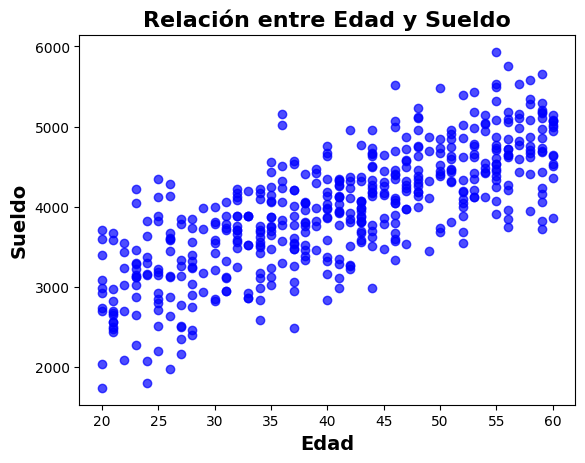

In [23]:
# Crear un DataFrame para los datos
data = pd.DataFrame({'Edad': edad, 'Sueldo': sueldo})

# Visualizar los datos
plt.scatter(data['Edad'], data['Sueldo'], alpha=0.7, color='blue')
plt.title('Relaci√≥n entre Edad y Sueldo', fontsize=16, fontweight="bold")
plt.xlabel('Edad', fontsize=14, fontweight="bold")
plt.ylabel('Sueldo', fontsize=14, fontweight="bold")
plt.show()

‚úÖ **Interpretaciones**

**Tendencia positiva clara:**

+ A medida que la edad aumenta, tambi√©n tiende a aumentar el sueldo.

+ Esto sugiere una correlaci√≥n positiva entre edad y sueldo.

**Mayor dispersi√≥n en edades tempranas:**

+ En el rango de 20 a 30 a√±os hay m√°s variabilidad en sueldos.

+ Esto puede deberse a diferentes niveles de experiencia o tipo de empleo en personas j√≥venes.

**Sueldo m√°s estable en edades altas:**

+ Desde los 40 a√±os en adelante, los sueldos son m√°s altos y parecen m√°s concentrados en una franja, lo que sugiere una posible estabilizaci√≥n salarial.

**Algunos valores at√≠picos (outliers):**

+ Hay puntos que est√°n lejos de la "nube principal", tanto por debajo como por encima.

+ Ser√≠a interesante investigar esos casos: podr√≠an ser personas con sueldos inusualmente bajos o altos para su edad.

‚úÖ **Algunas hip√≥tesis propuestas:**
+ A mayor edad, m√°s experiencia laboral, lo que conlleva a un mayor sueldo.
+ A partir de cierta edad, los aumentos de sueldo parecen ser m√°s lentos o los sueldos pueden ser m√°s estables.
+ La dispersi√≥n en sueldos de personas j√≥venes podr√≠a darse a distintos niveles de formaci√≥n/educaci√≥n o trabajos de jornadas parciales.

In [24]:
# Crear el modelo de regresi√≥n lineal
X = data[['Edad']]
y = data['Sueldo']

modelo_x = LinearRegression()
modelo_x.fit(X, y)

# Predicciones
data['Prediccion'] = modelo_x.predict(X)

In [25]:
print("Coeficientes : ", modelo_x.coef_)
print("bias = ", modelo_x.intercept_)

Coeficientes :  [49.43004024]
bias =  1944.426524726718


In [26]:
# Calcular el MAE y MSE del modelo
mse = mean_squared_error(y, data['Prediccion'])
mae = mean_absolute_error(y, data['Prediccion'])
print(f"MSE Regresi√≥n Lineal: {mse:.2f}")
print(f"MAE Regresi√≥n Lineal: {mae:.2f}")

MSE Regresi√≥n Lineal: 238269.14
MAE Regresi√≥n Lineal: 384.49


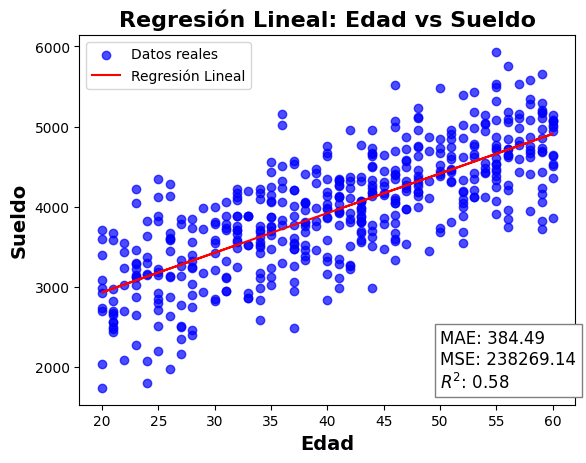

In [27]:
# Agregar m√©tricas al gr√°fico
plt.text(np.max(X) - 10, min(y) + 0.5,
         f"MAE: {mae:.2f}\nMSE: {mse:.2f}\n$R^2$: {modelo_x.score(X,y):.2f}",
         fontsize=12, color='black',
         bbox=dict(facecolor='white', edgecolor='gray'))

# Visualizar los resultados
plt.scatter(data['Edad'], data['Sueldo'], alpha=0.7, color='blue', label='Datos reales')
plt.plot(data['Edad'], data['Prediccion'], color='red', label='Regresi√≥n Lineal')
plt.title('Regresi√≥n Lineal: Edad vs Sueldo', fontsize=16, fontweight="bold")
plt.xlabel('Edad', fontsize=14, fontweight="bold")
plt.ylabel('Sueldo', fontsize=14, fontweight="bold")
plt.legend()
plt.show()

‚úÖ **Interpretaciones**

**R¬≤ = 0.58 (Coeficiente de determinaci√≥n):**

+ Aproximadamente 58% de la variabilidad del sueldo puede explicarse por la edad.

+ Es una relaci√≥n moderada, lo que sugiere que hay otros factores importantes que tambi√©n influyen en el sueldo (por ejemplo, estudios, experiencia, industria, entre otros posibles factores).

**MAE y MSE:**

+ MAE (Error absoluto medio): en promedio, el modelo se equivoca en ~384 unidades monetarias.

+ MSE (Error cuadr√°tico medio): castiga errores grandes m√°s fuertemente (por eso es mayor).

+ Ambas m√©tricas hablan del desempe√±o predictivo del modelo, siendo MAE m√°s f√°cil de interpretar directamente.

**Dispersi√≥n alrededor de la l√≠nea:**

+ Se observa que muchos puntos no caen exactamente sobre la l√≠nea, especialmente en edades j√≥venes y mayores ‚Üí hay variabilidad no explicada.

+ Lo anterior se conoce como error o residuo.



In [28]:
print(interpretacion("Regresi√≥n lineal", modelo_x.score(X,y), "sueldo", X.columns))

Modelo de regresi√≥n Regresi√≥n lineal
    57.53% de la variabilidad en sueldo se puede explicar utilizando: ['Edad'].


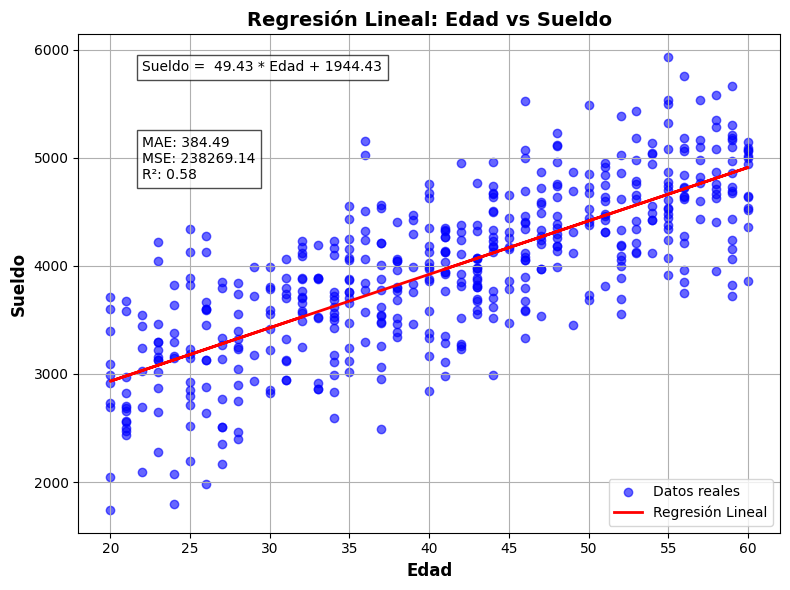

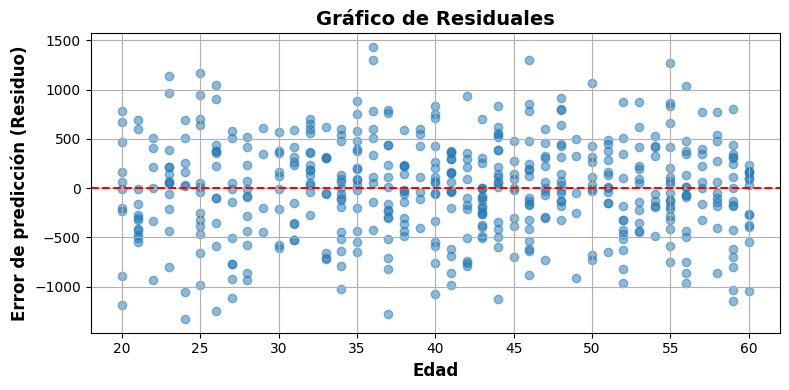

In [29]:
# Coeficientes
a = modelo_x.intercept_
b = modelo_x.coef_[0]

# Gr√°fico principal junto a la recta de regresi√≥n
plt.figure(figsize=(8,6))
plt.scatter(X, y, color='blue', label="Datos reales", alpha=0.6)
plt.plot(X, data["Prediccion"], color='red', label="Regresi√≥n Lineal", linewidth=2)
plt.title("Regresi√≥n Lineal: Edad vs Sueldo", fontsize=14, fontweight='bold')
plt.xlabel("Edad", fontsize=12, fontweight='bold')
plt.ylabel("Sueldo", fontsize=12, fontweight='bold')
plt.legend()

# Ecuaci√≥n sobre el gr√°fico
plt.text(22, 5800, f"Sueldo =  {b:.2f} * Edad + {a:.2f}", fontsize=10, bbox=dict(facecolor='white', alpha=0.7))

# M√©tricas
plt.text(22, 4800, f"MAE: {mae:.2f}\nMSE: {mse:.2f}\nR¬≤: {modelo_x.score(X, y):.2f}", fontsize=10, bbox=dict(facecolor='white', alpha=0.7))

plt.grid(True)
plt.tight_layout()
plt.show()

# Gr√°fico de residuales
residuals = y - data['Prediccion']
plt.figure(figsize=(8,4))
plt.scatter(X, residuals, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.title("Gr√°fico de Residuales", fontsize=14, fontweight="bold")
plt.xlabel("Edad", fontsize=12, fontweight="bold")
plt.ylabel("Error de predicci√≥n (Residuo)", fontsize=12, fontweight="bold")
plt.grid(True)
plt.tight_layout()
plt.show()


‚úÖ **RECORDATORIO**

El entrenamiento, en este caso, se aplica con el conjunto de datos completo. Sin embargo, en un escenario real, eso DEBE EVITARSE.